# Home Assignment

Names: Lidor Erez, Dvir Rehavi, Guy Mizrahi

## First Task

Show that the maximum likelihood estimates for a univariate Normal distribution with unknown mean and variance are given by:

$$\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

$$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})(x_i - \hat{\mu})^T$$


### Solution

The likelihood function for a univariate normal distribution is given by:

$$
L(\mu,\sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}
$$


Simplifying the above expression, we get:

$$

L(\mu,\sigma^2) = \frac{1}{(2\pi\sigma^2)^{n/2}} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2}

$$

Taking the log of the likelihood function, we get:

$$

\log L(\mu,\sigma^2) = -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2

$$

Taking the derivative of the log likelihood function with respect to $\mu$ and $\sigma^2$, we get:

$$

\frac{\partial \log L(\mu,\sigma^2)}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) = 0

$$


$$

\frac{\partial \log L(\mu,\sigma^2)}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_i - \mu)^2 = 0

$$




### Finding $\hat{\mu}$

$\frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) = 0$

$\sum_{i=1}^{n} (x_i - \mu) = 0$

$\sum_{i=1}^{n} x_i - n\mu = 0$

$\sum_{i=1}^{n} x_i = n\mu$

$\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i$

### Finding $\hat{\sigma}^2$

$-\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_i - \mu)^2 = 0$

$\frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_i - \mu)^2 = \frac{n}{2\sigma^2}$

$\sum_{i=1}^{n} (x_i - \mu)^2 = n\sigma^2$

$\sum_{i=1}^{n} (x_i - \hat{\mu})^2 = n\hat{\sigma}^2$

$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2$

Thus the maximum likelihood estimates for a univariate Normal distribution with unknown mean and variance are given by:

$$\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

$$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2$$

## Second Task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from NN import NN, NeuralNetworkCV,trainNN
from RF_TASK import RF, RandomForestCV
import torch

In [2]:
# Loading Data
M1 = np.loadtxt("./data/M1.csv",delimiter=',')
M2 = np.loadtxt("./data/M2.csv",delimiter=',')
S1 = np.loadtxt('./data/Sigma1.csv',delimiter=',')
S2 = np.loadtxt('./data/Sigma2.csv',delimiter=',')

# A priori probabilities
P1 = 0.35
P2 = 0.65

### ** Task 2.1 ** 

Generate 10,000 observations from the two distributions, proportionate to the a priori probabilities, which will be the training set.

In [3]:

# sample size for training set
n = 10000
sample_size_1 = int(n*P1)
sample_size_2 = int(n*P2)

# Create Distribution
np.random.seed(11)
dist1 = np.random.multivariate_normal(M1,S1, sample_size_1)
dist2 = np.random.multivariate_normal(M2,S2,sample_size_2)
y1 = np.ones(sample_size_1)
y2 = np.zeros(sample_size_2)

# stack distributions:
data = np.vstack([dist1,dist2])
labels = np.hstack([y1,y2])

### ** Task 2.2 ** 

Compute the MLE estimators for each of the class conditional parameters and compare them to the true values.

In [4]:
mu_hat_dist1 = np.mean(dist1,axis=0)
sigma_hat_dist1 = np.cov(dist1,rowvar=False)
mu_hat_dist2 = np.mean(dist2,axis=0)
sigma_hat_dist2 = np.cov(dist2,rowvar=False)

In [5]:
mu_hat_dist1 - M1

array([ 0.06878839, -0.0142574 ,  0.00821525, -0.02172319,  0.0076861 ,
        0.02009271])

In [6]:
sigma_hat_dist1 - S1

array([[ 1.16832631e-01, -8.24101661e-02, -8.67918214e-02,
        -2.30607378e-05, -1.87985650e-02, -8.74381129e-02],
       [-8.24101661e-02,  1.98174675e-02,  1.64271422e-02,
         3.60861825e-02, -2.89064480e-03,  2.09763943e-02],
       [-8.67918214e-02,  1.64271422e-02,  8.63138130e-02,
         2.81426491e-02, -5.36883998e-02,  2.49536534e-02],
       [-2.30607378e-05,  3.60861825e-02,  2.81426491e-02,
        -9.89766242e-02,  1.52810215e-02, -6.43296831e-03],
       [-1.87985650e-02, -2.89064480e-03, -5.36883998e-02,
         1.52810215e-02,  8.80818967e-03, -4.37838488e-02],
       [-8.74381129e-02,  2.09763943e-02,  2.49536534e-02,
        -6.43296831e-03, -4.37838488e-02, -6.24944047e-02]])

In [7]:
mu_hat_dist2 - M2

array([-0.00213606, -0.00536005,  0.03974838, -0.00373534,  0.04643738,
       -0.0245269 ])

In [8]:
sigma_hat_dist2 - S2

array([[ 0.01111553,  0.0222173 ,  0.02412015, -0.04550668, -0.06558669,
        -0.06236667],
       [ 0.0222173 , -0.02742164, -0.00346997,  0.03713569,  0.05796159,
         0.00110358],
       [ 0.02412015, -0.00346997, -0.05057879, -0.02810151, -0.01386905,
         0.05265772],
       [-0.04550668,  0.03713569, -0.02810151,  0.00299614, -0.07794885,
         0.05495672],
       [-0.06558669,  0.05796159, -0.01386905, -0.07794885, -0.01548133,
         0.07608907],
       [-0.06236667,  0.00110358,  0.05265772,  0.05495672,  0.07608907,
         0.00018072]])

### ** Task 2.3 **

Generate another set, with 2,000 observations (this will serve as validation set).

In [9]:
# Sample Size
n_val = 2000
sample_size1_val = int(n_val*P1)
sample_size2_val = int(n_val*P2)

# Create distributions

np.random.seed(11)
dist1_val = np.random.multivariate_normal(M1,S1, sample_size1_val)
dist2_val = np.random.multivariate_normal(M2,S2,sample_size2_val)
y1_val = np.ones(sample_size1_val)
y2_val = np.zeros(sample_size2_val)

# stack distributions for validation
data_val = np.vstack([dist1_val,dist2_val])
labels_val = np.hstack([y1_val,y2_val])

### ** Task 2.4 **

Fit a random forest to the data. Use the validation set to compare a number of forest configurations and choose the best performing one. Then use CV-10 over the training set to estimate the model accuracy and generalization error. (You may not use existing functions for the cross-validation for optimization and estimation part but write your own).

In [10]:
from itertools import product
from tqdm import tqdm

#### Chossing the best performing configuration:

In [11]:
dct = {
    'n_estimator':[300,500],
    'max_depth':[5,7],
    'min_samples_leaf':[2,4],
    'min_samples_split':[2,5,10]
}

In [12]:
# This function creates combinations from the feature space dictionary.
def parameterSub(paramter_space):
    values = paramter_space.values()
    feature_combs = {}
    combinations = list(product(*values))

    for i,comb in enumerate(combinations):
        feature_combs[f'combination_{i}'] = comb
    
    return feature_combs

param_space = parameterSub(dct)
param_space

{'combination_0': (300, 5, 2, 2),
 'combination_1': (300, 5, 2, 5),
 'combination_2': (300, 5, 2, 10),
 'combination_3': (300, 5, 4, 2),
 'combination_4': (300, 5, 4, 5),
 'combination_5': (300, 5, 4, 10),
 'combination_6': (300, 7, 2, 2),
 'combination_7': (300, 7, 2, 5),
 'combination_8': (300, 7, 2, 10),
 'combination_9': (300, 7, 4, 2),
 'combination_10': (300, 7, 4, 5),
 'combination_11': (300, 7, 4, 10),
 'combination_12': (500, 5, 2, 2),
 'combination_13': (500, 5, 2, 5),
 'combination_14': (500, 5, 2, 10),
 'combination_15': (500, 5, 4, 2),
 'combination_16': (500, 5, 4, 5),
 'combination_17': (500, 5, 4, 10),
 'combination_18': (500, 7, 2, 2),
 'combination_19': (500, 7, 2, 5),
 'combination_20': (500, 7, 2, 10),
 'combination_21': (500, 7, 4, 2),
 'combination_22': (500, 7, 4, 5),
 'combination_23': (500, 7, 4, 10)}

In [13]:
res = {}
for key,val in tqdm(param_space.items()):
    rf = RF(*val)
    rf.train(data,labels)
    rf.predict(data_val)
    f1_score,_ = rf.computeMetrics(labels_val)
    res[key] = (f1_score,rf.params)

100%|██████████| 24/24 [01:16<00:00,  3.19s/it]


In [14]:
items = list(res.items())
by_f1 = sorted(items, key=lambda item: item[1][0], reverse=True)[0]
by_f1

('combination_8',
 (0.8211189913317573,
  {'n_estimators': 300,
   'max_depth': 7,
   'min_samples_leaf': 2,
   'min_samples_split': 10}))

#### Estimating the model accuracy and generalization error using CV-10:

In [15]:
best_params = by_f1[1][1] # get best parameters
best_rf = RF(*best_params.values()) # deploy a new RF with the best parameters

# Train using CV
rf_cv = RandomForestCV(best_rf,10,data,labels)
rf_cv.runCV()

(0.6606637806637806, 0.13414414414414416)

In [16]:
print(f'Random Forest F1 {np.round(rf_cv.avgRFF1*100,3)}%\nRandom Forest Generalization Error {np.round(rf_cv.avgRFoobErr*100,3)}%')

Random Forest F1 66.066%
Random Forest Generalization Error 13.414%


### ** Task 2.5 **

Fit a neural network to the data. Use the validation set to determine the number of neurons to use for the network. After choosing the number of neurons, use CV-10 over the training set to estimate the classification accuracy

#### Choosing the number of neurons:

In [17]:
input_size = data.shape[1]
output_size = 1
hidden_sizes = [2**i for i in range(4,10)]
result = {}

data_cp = data.copy()
labels_cp = labels.copy()

val_data_cp = data_val.copy()
val_labels_cp = labels_val.copy()

scaler = StandardScaler()

data_cp = scaler.fit_transform(data_cp)
val_data_cp = scaler.fit_transform(val_data_cp)

data_tens = torch.from_numpy(data_cp).to(torch.float32)
labels_tens = torch.from_numpy(labels_cp).to(torch.float32).unsqueeze(1)

val_data_tens = torch.from_numpy(val_data_cp).to(torch.float32)
val_labels_tens = torch.from_numpy(val_labels_cp).to(torch.float32).unsqueeze(1)

labels_size = labels.shape[0]

# Handle imbalance of data using weights in loss function
num_zeros = torch.sum(labels_tens == 0).item()
num_ones = torch.sum(labels_tens == 1).item()

pos_weight = num_zeros/num_ones

criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight]))

for hidden_size in hidden_sizes:
    net = NN(input_size,hidden_size,output_size)
    optimizer = torch.optim.Adam(net.parameters(),lr=1e-1)

    _,val_loss = trainNN(net,
                                  data_tens,
                                  labels_tens,
                                  optimizer,
                                  criterion,
                                  1000,
                                  200,
                                   val_data_tens,
                                   val_labels_tens,
                                   validate=True)
    
    result[hidden_size] = (val_loss)

In [18]:
result_items = list(result.items())

by_loss = sorted(result_items,key=lambda item: item[0])[0]

print(f'{by_loss[0]} neurons in the hidden layer result in {by_loss[1]} loss value.')

16 neurons in the hidden layer result in 0.348433119058609 loss value.


#### Estimating the classification accuracy using CV-10:

In [19]:
best_net  = NN(input_size,by_loss[0],output_size)
nn_cv = NeuralNetworkCV(data_tens,labels_tens,10,best_net)

criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight]))
optimizer = torch.optim.Adam(best_net.parameters(),lr=1e-1)
nn_cv.runCV(optimizer, criterion)

(0.8797619047619047, 0.25794767066836355)

### ** Task 2.6 **

Choose one of the two models above. We will now consider the overfitting
phenomenon as a function of training set size. Fit the model with training sets of size $𝑁 = 10, 20, 30, … ,1,000.$ Plot the test and training error as a function of 𝑁. *For estimating test error, use the validation set.

In [20]:

net_of = NN(input_size, by_loss[0],output_size)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight]))
optimizer = torch.optim.Adam(net_of.parameters(),lr=1e-1)

train_losses = []
val_losses = []
for sample_size in range(10,1001,10):
    train_loss,val_loss = trainNN(net_of,
            data_tens[:sample_size,:],
            labels_tens[:sample_size,:],
            optimizer,
            criterion,
            sample_size,
            200,
            val_data_tens,
            val_labels_tens,
            validate=True)
    train_losses.append(train_loss/sample_size)
    val_losses.append(val_loss/200)

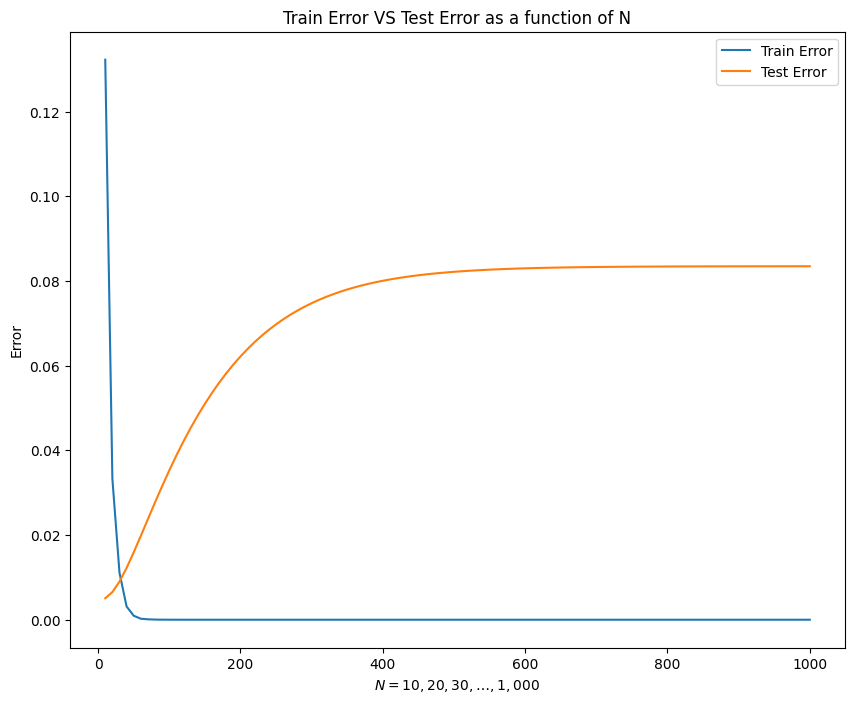

In [21]:
idx = list(range(10,1001,10))
plt.figure(figsize=(10,8))
plt.plot(idx,train_losses,label='Train Error')
plt.plot(idx, val_losses,label='Test Error')
plt.title("Train Error VS Test Error as a function of N")
plt.xlabel("$N = 10,20,30,\ldots,1,000$")
plt.ylabel("Error")
plt.legend()
plt.show()